# Libraries

In [81]:
import numpy as np, matplotlib.pyplot as plt
from Bio.Seq import Seq
from Bio import SeqIO

# Data

In [82]:
sequence = SeqIO.read('x.fasta', 'fasta')
SeqA = sequence.seq[:100]
SeqA

Seq('CTAACCCCTAACCCCTAACCCCTAACCCCTAACCCTAACCCTAACCCCTAACCC...AAC')

In [83]:
sequence2 = SeqIO.read('y3.fasta', 'fasta')
SeqB = sequence2.seq[:100]
SeqB

Seq('ACCCCTAACCCCTAACCCTAACCCTAACCCTAACCCCTAAACCCCTAACCCCTA...CCC')

# Quiz

## 1. Sequence Manipulation

### 1. Display the total length of Sequence X and Y.

In [84]:
print(f"The length of Sequence A: {len(SeqA)}")
print(f"The length of Sequence B: {len(SeqB)}")
print(f"The total length of Sequence A and Sequence B: {len(SeqA) + len(SeqB)}")

The length of Sequence A: 100
The length of Sequence B: 100
The total length of Sequence A and Sequence B: 200


### 2. Display which index the first time the codon CGC appearns in Sequece X and Sequence Y

In [85]:
print(f"First Index CGC at Sequence A: {SeqA.find('CGC')}")
print(f"First Index CGC at Sequence B: {SeqB.find('CGC')}")

First Index CGC at Sequence A: -1
First Index CGC at Sequence B: -1


### 3. Create new sequence by this following task:

#### 1. Take the first 10 Nucleotides from Sequence X and last 5 nucleotides from Sequence X.

In [86]:
first_x = SeqA[:10]
sec_x = SeqA[-5:]

#### 2. Take the first 20 nucleotides from sequence Y and the last 3 nucelotides from sequence Y

In [87]:
first_y = SeqB[:21]
sec_y = SeqB[-3:]

#### Combining

In [88]:
SeqC = first_x + sec_x + first_y + sec_y
SeqC.replace('N', '')
SeqC

Seq('CTAACCCCTACTAACACCCCTAACCCCTAACCCTAACCC')

In [89]:
print(len(SeqC))

39


## 2. Sequence Analysis and Plotting

### 1. Display the nucleotides base (A and C) Frequency for Sequence Z with a chart using matplotlib library

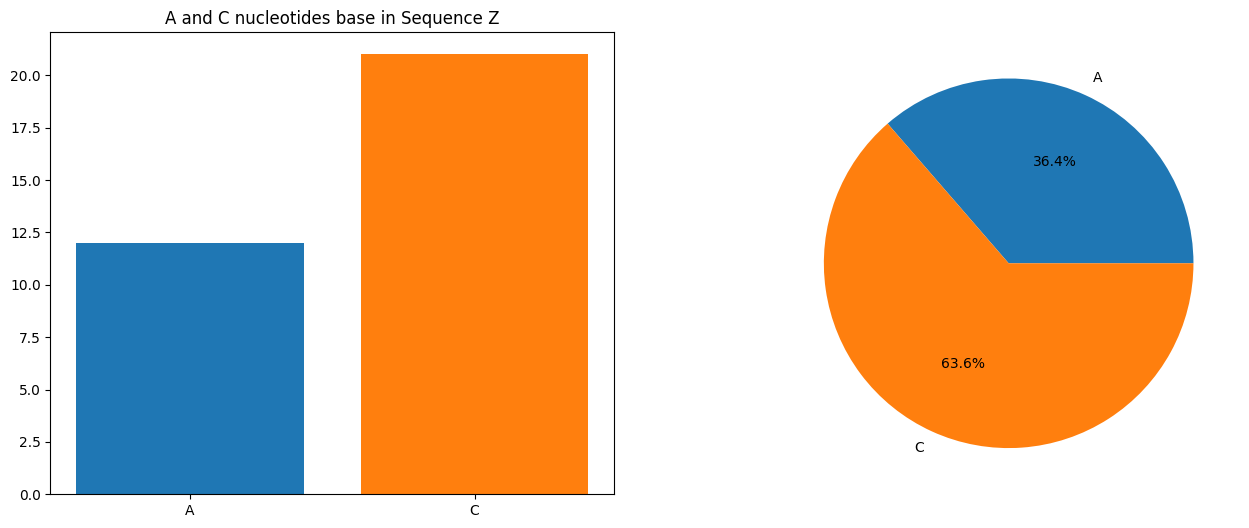

In [90]:
baseA = SeqC.count('A')
baseC = SeqC.count('C')
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
ax[0].bar('A', baseA)
ax[0].bar('C', baseC)
ax[0].set_title('A and C nucleotides base in Sequence Z')

plt.pie([baseA, baseC], labels=['A', 'C'], autopct = '%1.1f%%')
plt.show()

### Nucleotides Base

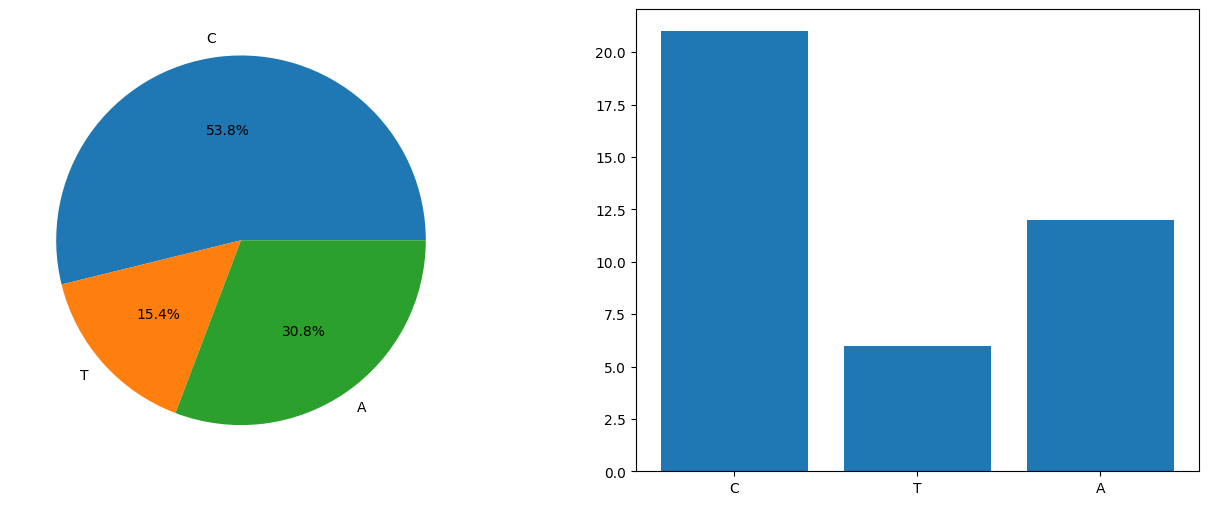

In [91]:
from collections import Counter
CounterC = Counter(SeqC)
keysC = CounterC.keys()
valuesC = CounterC.values()
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
plt.bar(keysC, valuesC)
ax[0].pie(valuesC, labels = keysC, autopct = '%1.1f%%')
plt.show()

### 2. Display GC and AT content percentage for Sequence Z

In [92]:
from Bio.SeqUtils import gc_fraction as GC, MeltingTemp as MT, molecular_weight as MW

GC content for Sequence C: 53.84615384615385
AT content for Sequence C: 46.15384615384615


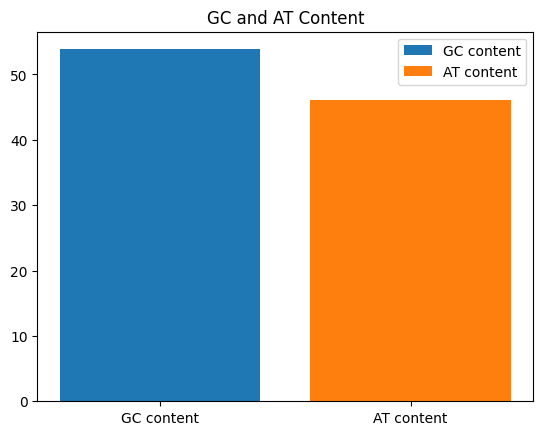

In [93]:
gcC = GC(SeqC) * 100
atC = 100 - gcC
print(f"GC content for Sequence C: {gcC}")
print(f"AT content for Sequence C: {atC}")
plt.bar('GC content', gcC)
plt.bar('AT content', atC)
plt.legend(['GC content', 'AT content'])
plt.title('GC and AT Content')
plt.show()

### 3. Display melting temperature for Sequence Z using Wallace Methods

In [94]:
print(f"Melting temperature for Sequence Z in Wallace method: {MT.Tm_Wallace(SeqC)}")

Melting temperature for Sequence Z in Wallace method: 120.0


### 4. Molecular Weight for Sequence Z

In [95]:
print(f"Molecular weight for Sequence Z: {MW(SeqC)}")

Molecular weight for Sequence Z: 11674.470299999997


## 3. DNA and mRNA Protein Synthesis

### 1. Transcribe and display the DNA Sequence Z into mRNA Sequence Z

In [96]:
print(f"DNA Sequence: {SeqC}")
print(f"DNA Complement: {SeqC.complement()}")
print(f"mRNA Sequence: {SeqC.transcribe()}")

DNA Sequence: CTAACCCCTACTAACACCCCTAACCCCTAACCCTAACCC
DNA Complement: GATTGGGGATGATTGTGGGGATTGGGGATTGGGATTGGG
mRNA Sequence: CUAACCCCUACUAACACCCCUAACCCCUAACCCUAACCC


### 2. Translate and display mRNA Sequence Z into Amino Acid Sequence

Amino Acid of Sequence Z: LTPTNTPNP*P*P


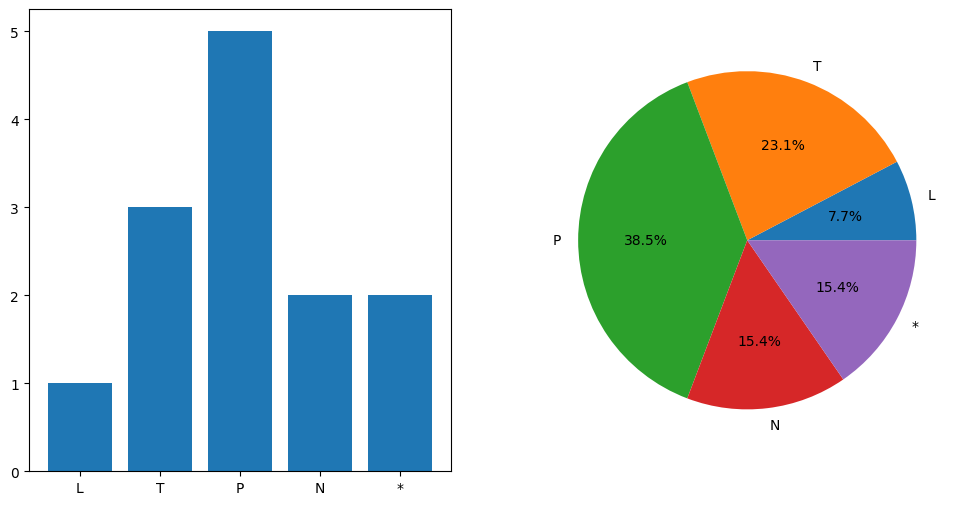

In [97]:
print(f"Amino Acid of Sequence Z: {SeqC.translate()}")
protein = Counter(SeqC.translate())
fig, ax = plt.subplots(1, 2, figsize=(12,6))
plt.pie(protein.values(), labels= protein.keys(), autopct='%1.1f%%')
ax[0].bar(protein.keys(), protein.values())
plt.show()

## 4. Sequence Alignment

### 1. Perform local alignment pairwise between sequence X and sequence Y and display the alignment score.

In [98]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [99]:
local_alignment = pairwise2.align.localxx(SeqA, SeqB)
for l in local_alignment:
    print(format_alignment(*l))

4 ACCCCTAACCCCTAACCCCTAACCCCTAACCCTAACCC-TAA-CCCCTAACCCCTAACCC-TAACCCCTAACCCCTAACCCCTAACCCCTAACCCCTAA---C
  ||||||||||||||| |||||| ||||||||||||||| ||| ||||||||||||||||| ||| ||||||||||||||||||||||||||||||||||   |
1 ACCCCTAACCCCTAA-CCCTAA-CCCTAACCCTAACCCCTAAACCCCTAACCCCTAACCCCTAA-CCCTAACCCCTAACCCCTAACCCCTAACCCCTAACCCC
  Score=94

3 AACCCCTAACCCCTAACCCCTAACCCCTAACCCTAACCC-TAA-CCCCTAACCCCTAACCC-TAACCCCTAACCCCTAACCCCTAACCCCTAACCCCTAA---C
  | |||||||||||||| |||||| ||||||||||||||| ||| ||||||||||||||||| ||| ||||||||||||||||||||||||||||||||||   |
1 A-CCCCTAACCCCTAA-CCCTAA-CCCTAACCCTAACCCCTAAACCCCTAACCCCTAACCCCTAA-CCCTAACCCCTAACCCCTAACCCCTAACCCCTAACCCC
  Score=94

4 ACCCCTAACCCCTAACCCCTAACCCCTAACCCTAACCC-TAA-CCCCTAACCCCTAACCC-TAACCCCTAACCCCTAACCCCTAACCCCTAACCCCTAA---C
  |||||||||||||||| ||||| ||||||||||||||| ||| ||||||||||||||||| ||| ||||||||||||||||||||||||||||||||||   |
1 ACCCCTAACCCCTAAC-CCTAA-CCCTAACCCTAACCCCTAAACCCCTAACCCCTAACCCCTAA-CCCTAACCCCTAACCCCTAACCCCTAACCCCTAACCCC
  Score=94

3 AACCC

In [101]:
local_alignment = pairwise2.align.localxx(SeqA, SeqB, score_only = True)
print(local_alignment)

94.0


### 2. Perform global alignment pairwise between sequence Y and sequence Z and display the alignment score

In [100]:
global_alignment = pairwise2.align.globalxx(SeqB, SeqC)
for g in global_alignment:
    print(format_alignment(*g))

ACCCCTAACCCCTAACCCTAACCCTAACCCTAACCCCTAAACCCCTAACCCCTAACCCCTAACCCTAACCCCTAACCCCTAACCCCTAACCCCTAACCCC
                                                   ||||||||| |  ||||   |  ||||||||||||||| |||||| |||
---------------------------------------------------CTAACCCCT-A--CTAA---C--ACCCCTAACCCCTAA-CCCTAA-CCC
  Score=39

ACCCCTAACCCCTAACCCTAACCCTAACCCTAACCCCTAAACCCCTAACCCCTAACCCCTAACCCTAACCCCTAACCCCTAACCCCTAACCCCTAACCCC
                                                  | |||||||| |  ||||   |  ||||||||||||||| |||||| |||
--------------------------------------------------C-TAACCCCT-A--CTAA---C--ACCCCTAACCCCTAA-CCCTAA-CCC
  Score=39

ACCCCTAACCCCTAACCCTAACCCTAACCCTAACCCCTAAACCCCTAACCCCTAACCCCTAACCCTAACCCCTAACCCCTAACCCCTAACCCCTAACCCC
                                                 |  |||||||| |  ||||   |  ||||||||||||||| |||||| |||
-------------------------------------------------C--TAACCCCT-A--CTAA---C--ACCCCTAACCCCTAA-CCCTAA-CCC
  Score=39

ACCCCTAACCCCTAACCCTAACCCTAACCCTAACCCCTAAACCCCTAACCCCTAA

In [102]:
global_alignment = pairwise2.align.globalxx(SeqB, SeqC, score_only = True)
print(global_alignment)

39.0


### 3. Hamming Levensthein

In [103]:
def hamming(SeqA, SeqB):
    h = 0
    for x, y in zip(SeqA, SeqB):
        if x != y:
            h +=1 
    return h
print(f"Hamming distance Seq X and Seq Y : {hamming(SeqA, SeqB)}")

Hamming distance Seq X and Seq Y : 83


In [104]:
from Levenshtein import distance
print(f"Levenshtein distance Seq X and Seq Y : {distance(SeqA, SeqB)}")

Levenshtein distance Seq X and Seq Y : 12


In [108]:
def dot_plus(SeqA, SeqB):
    print(' |' + SeqB)
    print('-' * (len(SeqB) + 2))
    for x in SeqA:
        print(x + "|", end='')
        for y in SeqB:
            if x == y:
                print('X', end = '')
            else:
                print(' ', end = '')
        print('')

dot_plus(SeqA,SeqB)

 |ACCCCTAACCCCTAACCCTAACCCTAACCCTAACCCCTAAACCCCTAACCCCTAACCCCTAACCCTAACCCCTAACCCCTAACCCCTAACCCCTAACCCC
------------------------------------------------------------------------------------------------------
C| XXXX   XXXX   XXX   XXX   XXX   XXXX    XXXX   XXXX   XXXX   XXX   XXXX   XXXX   XXXX   XXXX   XXXX
T|     X      X     X     X     X      X       X      X      X     X      X      X      X      X      
A|X     XX     XX    XX    XX    XX     XXX     XX     XX     XX    XX     XX     XX     XX     XX    
A|X     XX     XX    XX    XX    XX     XXX     XX     XX     XX    XX     XX     XX     XX     XX    
C| XXXX   XXXX   XXX   XXX   XXX   XXXX    XXXX   XXXX   XXXX   XXX   XXXX   XXXX   XXXX   XXXX   XXXX
C| XXXX   XXXX   XXX   XXX   XXX   XXXX    XXXX   XXXX   XXXX   XXX   XXXX   XXXX   XXXX   XXXX   XXXX
C| XXXX   XXXX   XXX   XXX   XXX   XXXX    XXXX   XXXX   XXXX   XXX   XXXX   XXXX   XXXX   XXXX   XXXX
C| XXXX   XXXX   XXX   XXX   XXX   XXXX    XXXX   XXXX   XXXX   XXX   XXX

In [109]:
def pair(a, b):
    return True if a == b else False

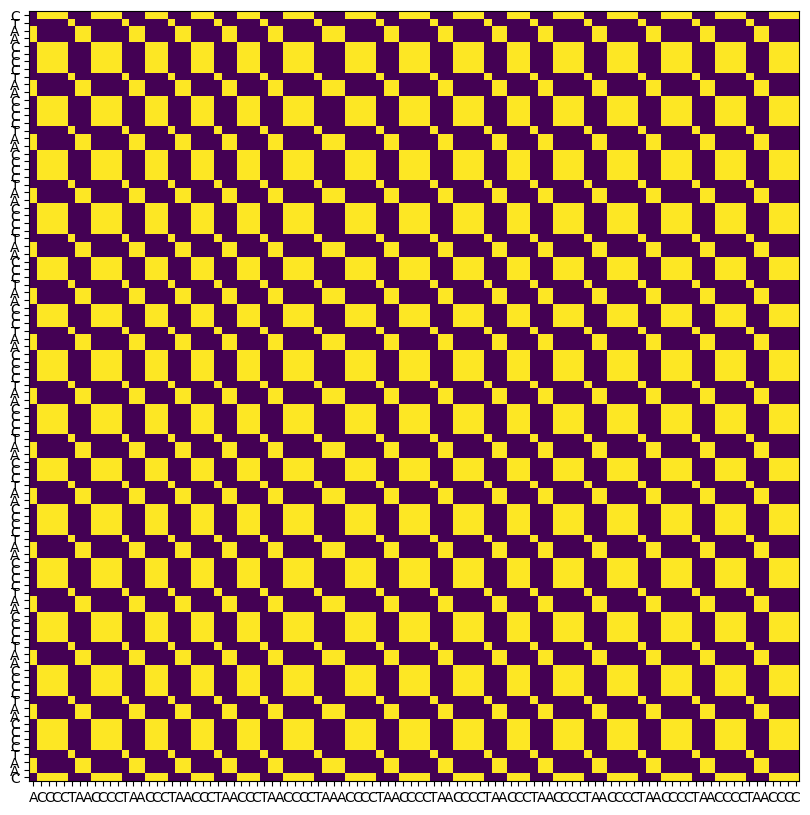

In [115]:
def create_matrix(SeqA, SeqB):
    matrix = []
    for x in SeqA:
        row = []
        for y in SeqB:
            row.append(pair(x, y))
        matrix.append(row)
    return matrix
plt.figure(figsize = (20, 10))
plt.imshow(np.array(create_matrix(SeqA,SeqB)))
plt.xticks(np.arange(len(SeqB)), SeqB)
plt.yticks(np.arange(len(SeqA)), SeqA)
plt.show()